# Ask Gemma, Data Science

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Package Installations and Importing libraries
**keras-nlp** is a Python library that provides tools and utilities for natural language processing (NLP) tasks using Keras. It offers pre-built models for text classification, sequence tagging, and language modeling. The library includes functionalities for tokenization, word embeddings, text preprocessing, and evaluation metrics. It seamlessly integrates with Keras, making it easier to build and train NLP models.

In [2]:
# Install Keras 3 last. 
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


**Python basic module**

* os: Provides ways to interact with the operating system and its environment variables.
* torch: PyTorch library for deep learning applications.
* pandas: Powerful data processing tool, ideal for handling CSV files and other forms of structured data.
* re : Provides support for working with regular expressions, enabling powerful pattern-based string operations.

**Wordcloud module**

* WordCloud : Python library used for generating word clouds, which are visual representations of text data where the size of each word indicates its frequency or importance.
* STOPWORDS : set of commonly used words that are often excluded from text analysis because they typically do not carry significant meaning or contribute to the understanding of the text.

**Keras module**
* GemmaCausalLM : A module provided by 'keras-nlp' library which provides a convenient way to build and train causal language models using Keras, which can be used for various NLP tasks such as text generation, machine translation, and dialog systems.

**IPython.display module**

* Markdown : Used to output text in Markdown format.
* display : Used to display objects in Jupyter notebooks.

In [3]:
import sklearn
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import keras
import keras_nlp
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from keras_nlp.models import GemmaCausalLM
import re
import warnings
warnings.filterwarnings('ignore')

2024-04-28 20:57:07.637576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 20:57:07.637690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 20:57:07.748001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import os
os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow".
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

## Loading Dataset
Dataset Link: https://www.kaggle.com/datasets/hserdaraltan/1000-data-science-concepts

This dataset covers more than 1000 common data science concepts. It covers several topics related to Statistics, Machine Learning, and Artificial Intelligence. It has two columns, one of which is questions or instructions, the other is responses to these instructions.

To download a dataset, follow these simple steps:

1. Look for the "Input" option located below the "Notebook" section in the right-side menu.
2. Click on the "+ Add Input" button.
3. In the search bar that appears, type "1000+-data-science-concepts".
4. Find the dataset in the search results and click the "+" button to add it to your notebook. This action will automatically download the dataset for you.

In [5]:
data = pd.read_csv('/kaggle/input/1000-data-science-concepts/data_science_concepts.csv',nrows=200)
data.head() # First 5 rows of the dataset

,Question,Answer
0,What is under-fitting and overfitting in machi...,"Underfitting is when a model is too simple, an..."
1,Can you explain what a false positive and a fa...,A false positive incorrectly indicates a condi...
2,Clarify the concept of Phase IV.,"Phase IV studies, also known as post-marketing..."
3,What is semi-supervised learning described in ...,Semi-supervised learning integrates both label...
4,Discuss the parallelization of training in gra...,Parallelizing training of a gradient boosting ...


In [6]:
data.tail() # Last 5 rows of the dataset

,Question,Answer
195,Why are activation functions required in neura...,"Activation functions introduce nonlinearity, e..."
196,Can you explain a bidirectional search algorithm?,A bidirectional search algorithm runs two simu...
197,Do gradient descent methods always converge to...,Gradient descent methods may converge to diffe...
198,Describe word2vec.,Word2vec is a suite of models used to produce ...
199,What is the difference between a generative an...,"Generative models learn data categories, while..."


**Dataset Information and Null Value Check**

* Check the number of features and values in dataset.
* Check for any NULL values in the dataset

In [7]:
print("Information of Dataset: ")
print(data.info(),'\n')

print("Check for NULL values: ")
print(data.isnull().sum().sum())

print("Shape of Dataset: ")
print(data.shape)

Information of Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  200 non-null    object
 1   Answer    200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB
None 

Check for NULL values: 
0
Shape of Dataset: 
(200, 2)


## Visualize Data using Word Cloud

This code generates word clouds for each column in a DataFrame (data). Here's a step-by-step explanation:

1. **Initialization**: Initialize an empty string comment_words to store concatenated words from all columns of the dataset and define a set of stopwords using the STOPWORDS set from the wordcloud library.

1. **Colormap Definition:** Define the colormap to be used for generating the WordCloud images. In this case, the 'viridis' colormap is chosen.

1. **Iteration through Columns:** Iterate through each column in the dataset, extracting the column name and its corresponding values. Concatenate all values in the column into a single string, converting them to uppercase.

1. **WordCloud Generation:** Generate a WordCloud for each column using the concatenated string of values. Customize the WordCloud's width, height, stopwords, minimum font size, and colormap. Plot each WordCloud image on the respective subplot, setting the title of each subplot to indicate the column it represents. Finally, adjust the layout and display the plot.

Overall, this code visualizes the distribution of words in each column of the DataFrame by creating word clouds, providing insights into the most frequent words or terms within each column.

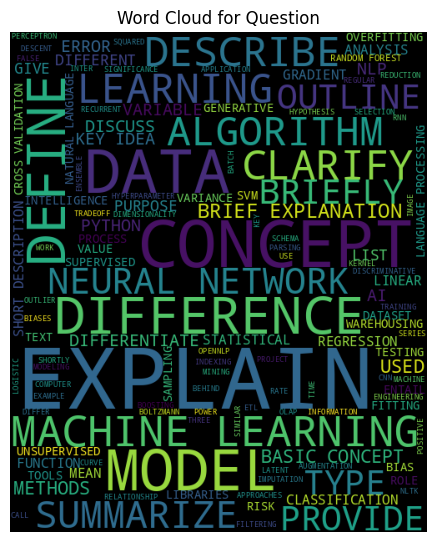

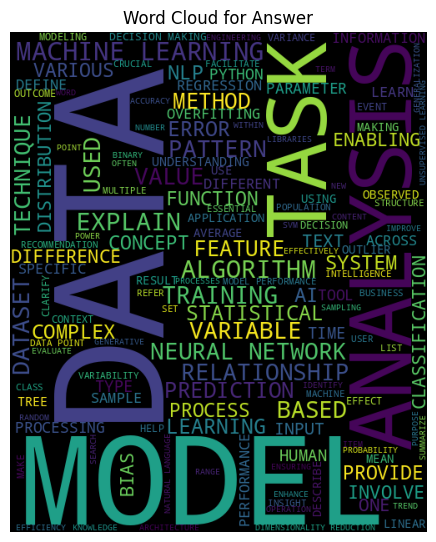

In [8]:
comment_words = ''
stopwords = set(STOPWORDS)

# Define the colormap
colormap = 'viridis'
 
# iterate through the csv file
for col in data.columns:
    # Concatenate all values in the column into a single string
    # and convert to lowercase
    comment_words += ' '.join(str(val).upper() for val in data[col]) + ' '

    # Generate WordCloud for the current column
    wordcloud = WordCloud(width=500, height=600,
                          stopwords=stopwords,
                          min_font_size=8).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(5, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud for {col}")
    plt.show()

## Gemma Model
**Gemma Model** is a collection of lightweight open-source generative AI (GenAI) models developed by Google DeepMind. These models are primarily aimed at developers and researchers. Gemma was released alongside Gemini, Google's closed-source generative AI chatbots.

There are two main models in the Gemma collection: **Gemma 2B** and **Gemma 7B.** These models are text-to-text decoder large language models (LLMs) with pretrained and instruction-tuned variants. Gemma 2B has a neural network with 2 billion parameters, while Gemma 7B has a neural network with seven billion parameters.

Google offers pretrained and instruction-tuned Gemma models suitable for running on laptops and workstations. These models are available to developers through various platforms. Additionally, Meta's Llama 2 is another open-source AI model designed to run on laptops, serving as more of a business tool compared to Gemma. Gemma is often favored for scientific tasks, while Llama 2 is considered more suitable for general-purpose tasks.

**Inputs and Outputs**
* Input: Gemma models take in text strings, which can range from questions and prompts to longer documents that require summarization.
* Output: In response, they generate text in English, offering answers, summaries, or other forms of text-based output, tailored to the input provided.

  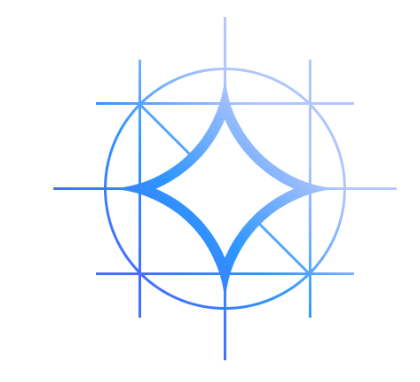

The provided code snippet creates an instance of the GemmaCausalLM model and assigns it to the variable gemma_lm. It creates the model from a preset configuration named "gemma_instruct_2b_en".This preset specifies the architecture, hyperparameters, and other settings for the model.

In [9]:
#Create the model using the from_preset method
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")
gemma_lm.summary()

Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,506,172,416 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,506,172,416 (9.34 GB)

 Trainable params: 2,506,172,416 (9.34 GB)

 Non-trainable params: 0 (0.00 B)

## Test Model before Tuning
Before we start the finetuning process, let's see how the Gemma model performs out of the box on our dataset. This section will show you how to run a simple question-answering test.

In [13]:
import time
from memory_profiler import memory_usage

# Define input text
input_text = "What is supervised machine learning?"

# Function to measure memory usage
def measure_memory(func):
    mem_usage = memory_usage((func, (input_text,), {}))
    return max(mem_usage)  # Maximum memory usage during function execution

# Define the function to be executed
def generate_with_memory(input_text):
    start_time = time.time()
    outputs = gemma_lm.generate(input_text, max_length=64)
    end_time = time.time()
    processing_time = end_time - start_time
    return outputs, processing_time

# Obtain memory usage for one iteration
memory_usage_one_iteration = measure_memory(generate_with_memory)
print("Memory usage for one iteration:", memory_usage_one_iteration, "MB")


Memory usage for one iteration: 2086.1484375 MB


In [ ]:
print(gemma_lm.generate("Can you explain neural networks?", max_length=256))

In [ ]:
#Prepare the dataset for fine-tuning
dataset = []
    
for index, row in data.iterrows():
    question, answer = row['Question'], row['Answer']
    template = (f"Question:\n{question}\n\nAnswer:\n{answer}")
    dataset.append(template)

## Fine tuning with LoRA

LoRA (Low-Rank Adaptation of Large Language Models) is a technique used to improve the efficiency and performance of large language models by significantly reducing the number of training parameters. The line enables LoRA specifically on the backbone architecture of the language model gemma_lm.

In [ ]:
#Enable LoRA for the model and set the LoRA rank to 64.
gemma_lm.backbone.enable_lora(rank=64)
gemma_lm.summary()

## Memory Control - Epochs

This block of code compiles the model using the specified loss function, optimizer, and metrics

1. SparseCategoricalCrossentropy is used as the loss function to compute the cross-entropy loss between the true labels and the predicted probabilities output by the model.It measures the difference between the true distribution of the labels and the predicted distribution.

1. Adam optimizer efficiently optimizes the parameters (weights and biases) of the neural network during training. It adapts the learning rate for each parameter individually based on the estimates of the first and second moments of the gradients.

1. SparseCategoricalAccuracy is used as the evaluation metric, which calculates accuracy during training.

In [ ]:
# Limit the input sequence length to 512 (to control memory usage).
gemma_lm.preprocessor.sequence_length = 512
# Use AdamW 
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
)
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

# Compile the model
gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()]
)


In [ ]:
gemma_lm.fit(dataset, epochs=6, batch_size=1)

## Test Model after Tuning
After training, let's see how much our Gemma model has improved. We'll rerun the question-answering test and compare the results to the pre-finetuning performance

In [ ]:
print(gemma_lm.generate("What is supervised machine learning?", max_length=256))

In [ ]:
print(gemma_lm.generate("What is regression? Which models can you use to solve a regression problem? ", max_length=256))

In [ ]:
print(gemma_lm.generate("What is K-fold cross-validation? ", max_length=256))

In [ ]:
print(gemma_lm.generate("What are the main parameters of the decision tree model?", max_length=256))

In [ ]:
print(gemma_lm.generate("Can you explain neural networks?", max_length=256))

In [ ]:
print(gemma_lm.generate("Can you explain what a false positive and a false negative are?", max_length=256))